In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
file_path ="Customer_Data.csv"
df = pd.read_csv(file_path)

In [3]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

(None,
   CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
 0  C10001    40.900749           0.818182      95.40              0.00   
 1  C10002  3202.467416           0.909091       0.00              0.00   
 2  C10003  2495.148862           1.000000     773.17            773.17   
 3  C10004  1666.670542           0.636364    1499.00           1499.00   
 4  C10005   817.714335           1.000000      16.00             16.00   
 
    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
 0                    95.4      0.000000             0.166667   
 1                     0.0   6442.945483             0.000000   
 2                     0.0      0.000000             1.000000   
 3                     0.0    205.788017             0.083333   
 4                     0.0      0.000000             0.083333   
 
    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
 0                    0.000000                          0.083333   
 1           

In [5]:
# Step 2: Preprocessing
# Drop customer ID column (not useful for clustering)
df_cleaned = df.drop(columns=["CUST_ID"], errors="ignore")

In [7]:
 #Handle missing values using mean imputation
imputer = SimpleImputer(strategy="mean")
df_imputed = pd.DataFrame(imputer.fit_transform(df_cleaned), columns=df_cleaned.columns)

In [8]:
# Standardize the features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df_imputed.columns)

In [9]:
# Step 3: Finding Optimal k using the Elbow Method
wcss = []  # Within-Cluster Sum of Squares
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

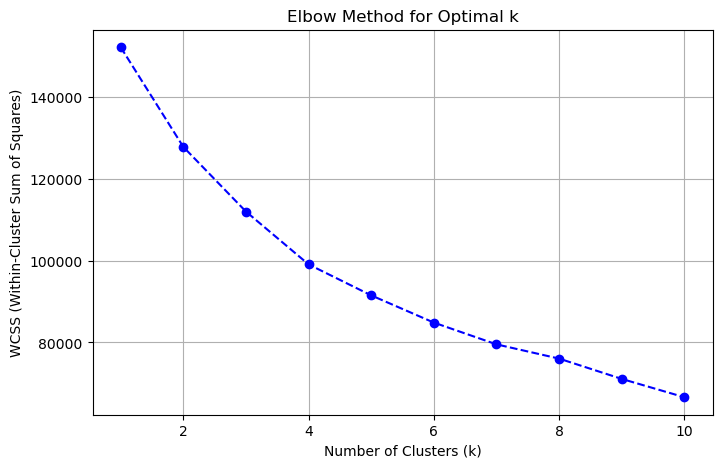

In [10]:
# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [11]:
# Step 4: Apply K-Means with the optimal k (Assume elbow suggests k=4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_scaled["Cluster"] = kmeans.fit_predict(df_scaled)


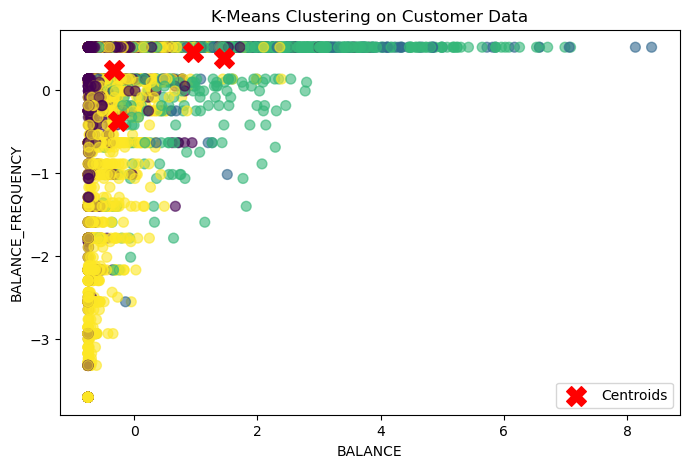

In [12]:
# Step 5: Visualize the Clusters (Using first two features)
plt.figure(figsize=(8, 5))
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=df_scaled["Cluster"], cmap="viridis", s=50, alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel(df_scaled.columns[0])
plt.ylabel(df_scaled.columns[1])
plt.title('K-Means Clustering on Customer Data')
plt.legend()
plt.show()

In [13]:
# Step 6: Display Cluster Distribution
print("Cluster Counts:\n", df_scaled["Cluster"].value_counts())

Cluster Counts:
 Cluster
3    3976
0    3367
2    1198
1     409
Name: count, dtype: int64
